# Análise das vendas de carros

## 0 - Importando as bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')  ##definindo estilo ggplot
plt.rcParams["figure.figsize"] = (8, 6) #fixando o figsize

In [4]:
car = pd.read_csv("C:\\Users\mateu\Ciência_de_Dados\Bases de Dados\car_prices\car_prices.csv")
car.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## 1 - Explorando o Dataset
- Primeiramente vou explorar o dataset. É muito importante conhece-lo antes de fazer as nossas análises, dessa forma, já iremos preparados para extrair insights da melhor forma!

In [5]:
car.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [6]:
car['saledate'] = car['saledate'].apply(lambda x: x.split(' GMT')[0].strip() if isinstance(x, str) else x) #Limpando a coluna datas
car['saledate'] = pd.to_datetime(car['saledate'], errors = 'coerce').dt.date #Convertendo para data a coluna





- No nosso caso, tive que usar uma função lambda para conseguir transformar a coluna "saledate" em data.

In [7]:
car['saledate'] = pd.to_datetime(car['saledate'])
car['saledate']

0        2014-12-16
1        2014-12-16
2        2015-01-15
3        2015-01-29
4        2014-12-18
            ...    
558832   2015-07-09
558833   2015-07-08
558834   2015-07-08
558835   2015-07-09
558836   2015-05-28
Name: saledate, Length: 558837, dtype: datetime64[ns]

In [8]:
car.isna().sum()


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           38
dtype: int64

### 1.1 Eliminando linhas

In [9]:
car = car.dropna(subset = ['sellingprice']) #com essa linha faltando será ruim para a análise
car = car.dropna(subset = ['saledate']) #linhas que foram cadastrados transmission errado

- Eliminei as linhas de sellingprice e saledate nulas

In [10]:
car.isna().sum()


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65351
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

### 1.2 - Conhecendo mais o Dataset

In [11]:
car['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [12]:
sorted(car['year'].unique())

[1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

O dataset possui carros de 1982 até 2015, vou verificar a quantidade de venda por ano de carro

Text(0, 0.5, 'Quantidade de Vendas')

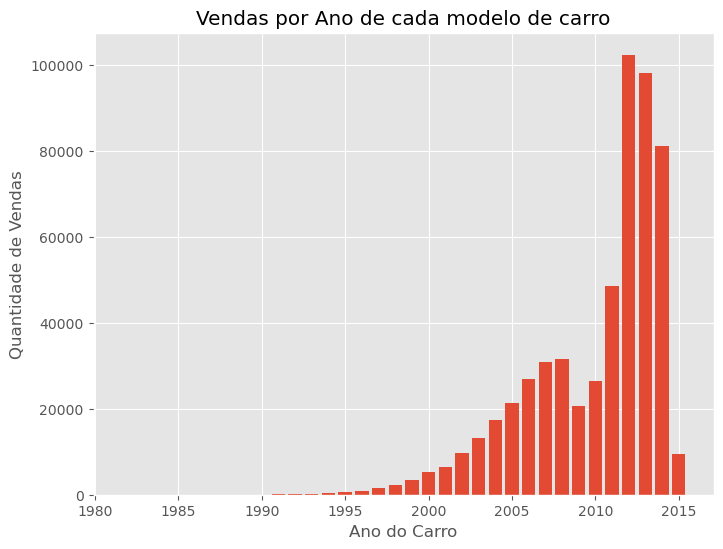

In [13]:
sales_yearcar = car['year'].value_counts().sort_values()
plt.bar(sales_yearcar.index, sales_yearcar)
plt.title('Vendas por Ano de cada modelo de carro')
plt.xlabel('Ano do Carro')
plt.ylabel('Quantidade de Vendas')

As vendas concentram-se em carros de 2010 a 2015. Agora irei verificar quando ocorreram a data das vendas

In [14]:
car['saledate'].dt.year.unique()

array([2014, 2015])

As vendas ocorreram em 2014 até 2015, ou seja, as vendas foram feitas em carros 0 e carros seminovos.

In [15]:
sorted(car['condition'].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 48.0,
 nan,
 46.0,
 47.0,
 49.0]

## 2 - A nota de Condition é afetada por quais parâmetros?

As condições do carro vão de 0 a 49. Mas não consigo saber se quanto menor a nota é melhor ou pior o estado do carro. Vou verificar isso agora

Text(0.5, 1.0, 'Dispersão entre Km percorrido e Condição do Carro')

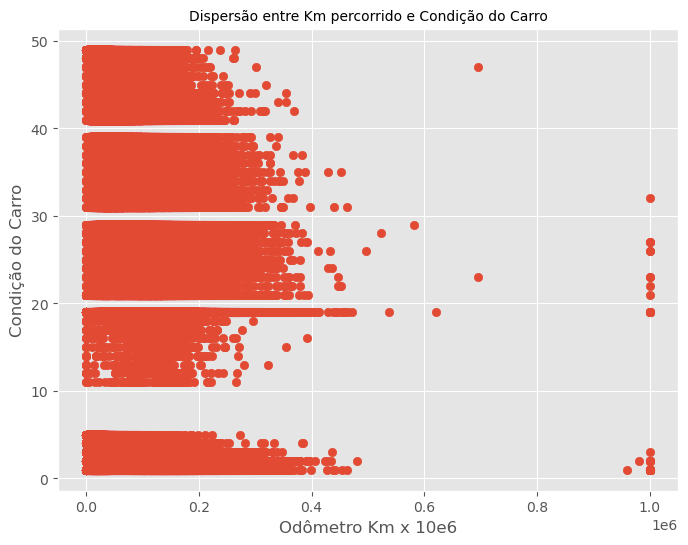

In [16]:
plt.scatter(car['odometer'], car['condition'])
plt.xlabel('Odômetro Km x 10e6')
plt.ylabel('Condição do Carro')
plt.title('Dispersão entre Km percorrido e Condição do Carro', fontsize = 10)

De acordo com o gráfico, a nota do carro não é interferida pelo odometro, pois temos todas as notas em carro 0 km, e todas as notas em 200.000 km percorridos por exemplo. Talvez a nota do carro seja referente ao ano que foi lançado e ao valor do carro.

In [17]:
car['mmr'].describe()

count    558799.000000
mean      13769.377495
std        9679.967174
min          25.000000
25%        7100.000000
50%       12250.000000
75%       18300.000000
max      182000.000000
Name: mmr, dtype: float64

Text(0.5, 1.0, 'MMR dos Carros')

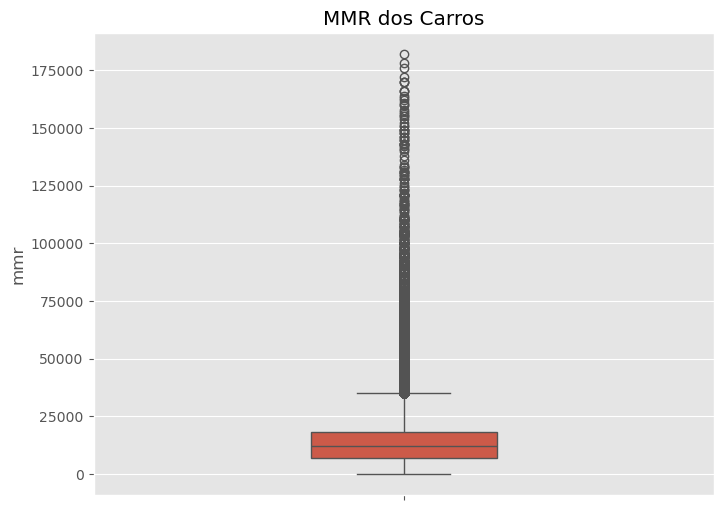

In [18]:
sns.boxplot(car['mmr'], width = 0.3)
plt.title('MMR dos Carros')

A maioria dos carros se concentram abaixo de 35mil mais ou menos. Vou criar uma categoria de carros primeiro

In [19]:
def car_classification(x): #função de classificação do preço do carro
    if x <5000:
        return 'D'
    if x <10000:
        return 'C'
    if x <20000:
        return 'B'
    else:
        return 'A'
    
def year_classification(x): # função de classificação do ano do carro
    if x <1990:
        return 80
    if x <2000:
        return 90
    if x <2010:
        return 2000
    else:
        return 2010


In [20]:
car['Category'] = car['mmr'].apply(car_classification)
car['Year Category'] = car['year'].apply(year_classification)

Text(0.5, 1.0, 'Mapa de Calor: Ano do Carro x Category MMR')

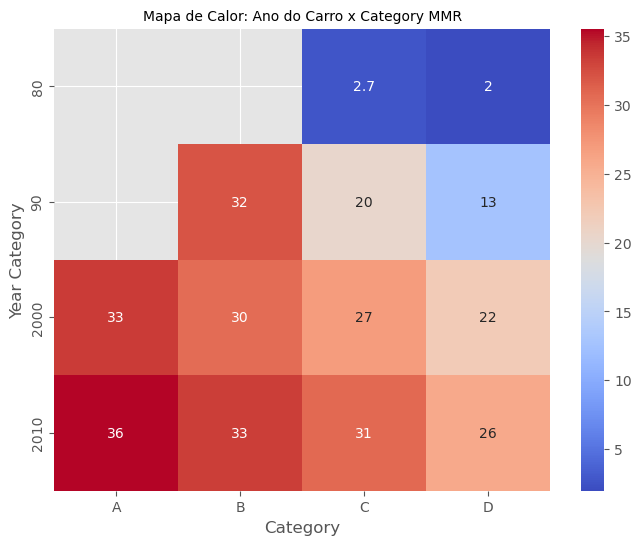

In [21]:
tabela = car[['Category','Year Category', 'condition']]  #criando uma pivot table
heatmap = pd.pivot_table(tabela,
              index = 'Year Category',
              columns = 'Category',
              values = 'condition',
              aggfunc = 'mean')
sns.heatmap(heatmap ,cmap = 'coolwarm', annot = True)
plt.title('Mapa de Calor: Ano do Carro x Category MMR', fontsize = 10)

Quanto maior o valor do carro, maior a média da condição dele, e quanto mais recente um carro,também melhor a condição dele

In [22]:
car

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Category,Year Category
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16,A,2010
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16,A,2010
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15,A,2010
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29,A,2010
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18,A,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,2015-07-09,A,2010
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08,A,2010
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,2015-07-08,A,2010
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-09,B,2010


## 3 - A concessionária vende mais carros de qual classe?

Text(0.5, 0, 'Condition')

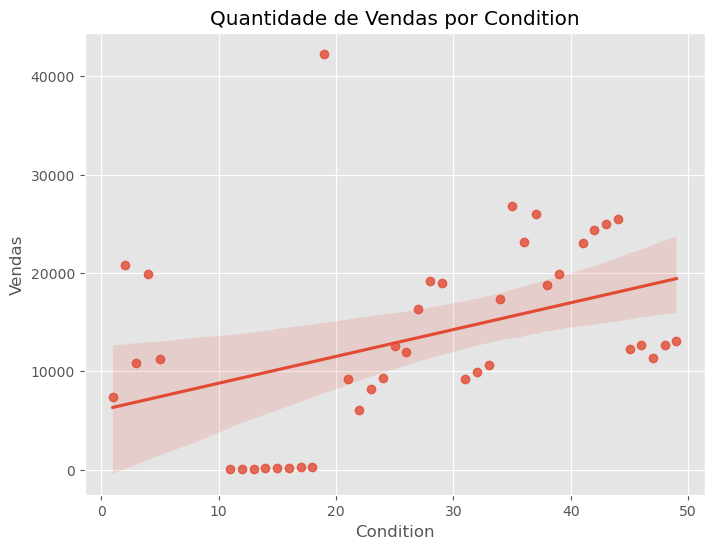

In [23]:
vendas_condition = car.groupby('condition')['vin'].count().reset_index()
vendas_condition

sns.regplot(x='condition',y='vin', data=vendas_condition)
plt.title('Quantidade de Vendas por Condition')
plt.ylabel('Vendas')
plt.xlabel('Condition')

Quanto melhor é a condição, maior é o número de vendas. Portanto a concessionária deveria ter uma processo interno focado na avaliação dos carros, para que fossem priorizados carros com notas de condicões melhoras, fazendo com que o giro de carros seja mais rápido

## 4 - Quais os tipos de Body mais vendidos?

Considerarei somente body de carros que tenham pelo menos 1% das vendas

Text(0.5, 0, 'Quantidade')

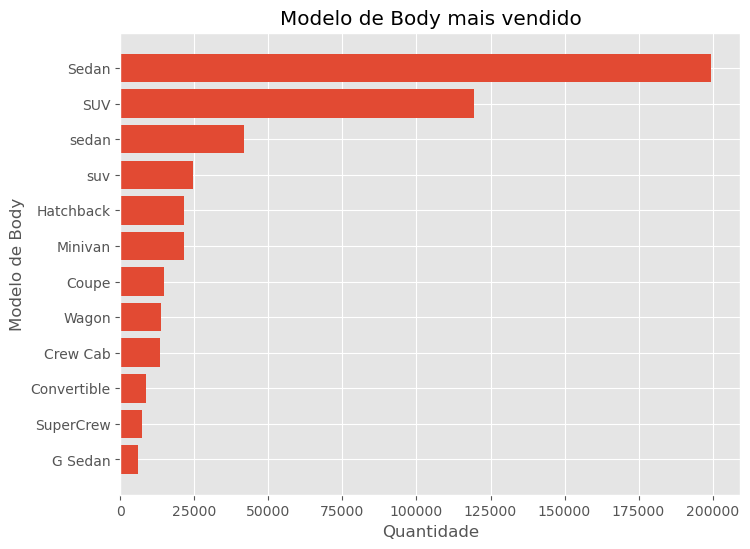

In [24]:
body_maior_1 = car['body'].value_counts(normalize= True)>0.01
body_filter = car[car['body'].isin(body_maior_1[body_maior_1].index)]
body_vendas = body_filter.groupby('body')['vin'].count().sort_values(ascending = True)

plt.barh(body_vendas.index,body_vendas)
plt.title('Modelo de Body mais vendido')
plt.ylabel('Modelo de Body')
plt.xlabel('Quantidade')

Aqui temos o campo sedan com dois nomes diferentes, iremos tratar esses dadosb

In [25]:
car['body'] = car['body'].str.lower()

Text(0.5, 0, 'Quantidade')

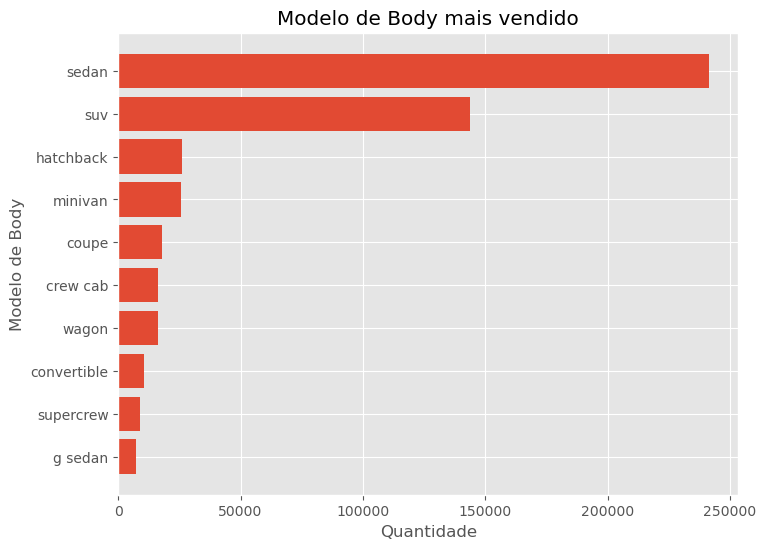

In [26]:
body_maior_1 = car['body'].value_counts(normalize= True)>0.01
body_filter = car[car['body'].isin(body_maior_1[body_maior_1].index)]
body_vendas = body_filter.groupby('body')['vin'].count().sort_values(ascending = True)

plt.barh(body_vendas.index,body_vendas)
plt.title('Modelo de Body mais vendido')
plt.ylabel('Modelo de Body')
plt.xlabel('Quantidade')

Pronto! Agora temos que Sedan e SUV são os carros mais vendidos. A concessionária poderia trabalhar com esses dois tipos em sua maioria, para conseguir aumentar o giro e oferecer mais modelos para os clientes! Mas por que será que esses carros foram os mais vendidos?

Text(0, 0.5, 'Tipo de Body')

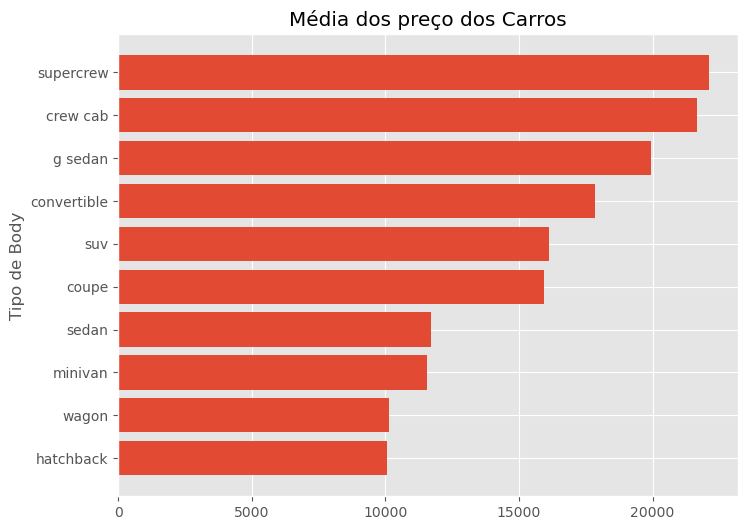

In [27]:
mean_price_body = body_filter.groupby('body')['sellingprice'].mean().sort_values(ascending = True)
plt.barh(mean_price_body.index, mean_price_body)
plt.title('Média dos preço dos Carros')
plt.ylabel('Tipo de Body')

## 5 - Quais as cores que mais saem

Mesmo o SUV e o Sedan tendo preço similar a algumas categorias de body, eles tem mais vendas.

Text(0.5, 1.0, 'Proporção de vendas por Cor de Body')

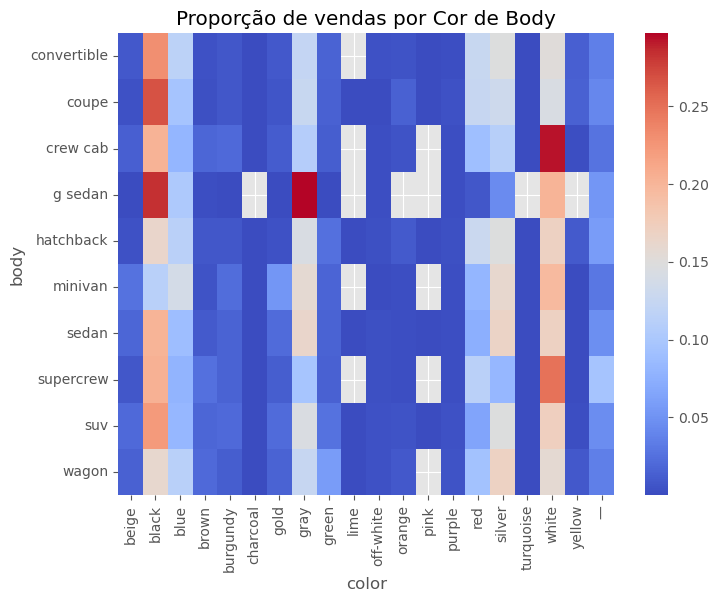

In [29]:
color_body = body_filter.groupby('body')['color'].value_counts(normalize = True).reset_index()
color_body_table = pd.pivot_table(index = 'body',
                                 columns =  'color',
                                 values = 'proportion',
                                 data = color_body)
sns.heatmap(color_body_table, cmap = 'coolwarm')
plt.title('Proporção de vendas por Cor de Body')

Os carros de body sedan e suv venderam mais carros pretos e brancos, assim como a maioria dos modelos de body. Entretando, os carros g sedan pretos e cinza foram os mais vendidos e o crew cab branco foi o mais escolhido. Talvez pois tivessem mais modelos dessas cores, ou fosse a preferida dos clientes 

## 6 - Qual tipo de transmissão é mais vendida

In [113]:
car['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

Text(0.5, 1.0, 'Vendas por Sistema de Transmissão')

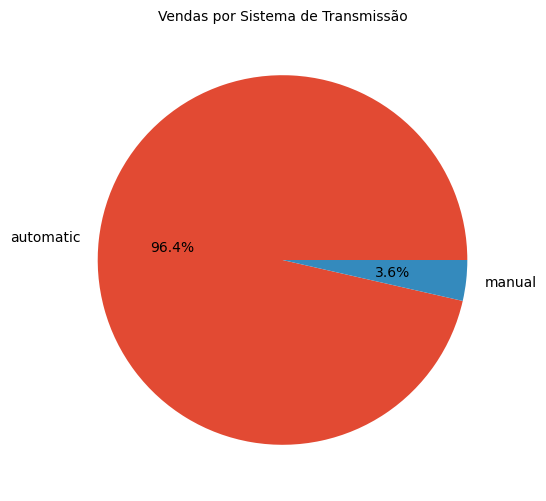

In [114]:
transmission = car['transmission'].value_counts()
plt.pie(transmission, autopct= '%1.1f%%', labels = transmission.index)
plt.title('Vendas por Sistema de Transmissão', fontsize = 10)

In [115]:
transmission

transmission
automatic    475904
manual        17544
Name: count, dtype: int64

Os carros mais vendidos são automaticos. Porém, pode ser que, como a maioria dos carros sao de 2010 a 2015, e só tenha carros automáticos desses anos, isso interfira na nossa análise. Vamos particionar as vendas por ano

In [116]:
year_transmission = car.groupby('year')['transmission'].value_counts().reset_index()
year_transmission
transmission = pd.pivot_table(columns = 'transmission',
                             index = 'year',
                             values = 'count',
                             aggfunc = 'sum',
                             data = year_transmission)
transmission

transmission,automatic,manual
year,,
1982,2.0,NaN
1983,1.0,NaN
1984,5.0,NaN
1985,6.0,4.0
1986,7.0,2.0
1987,8.0,NaN
1988,9.0,2.0
1989,18.0,1.0
1990,31.0,10.0


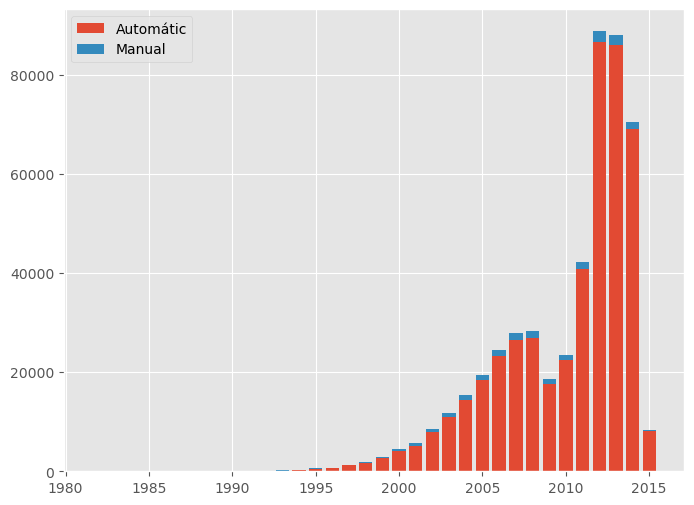

In [117]:
plt.bar(transmission.index, transmission['automatic'], label = 'Automátic')
plt.bar(transmission.index, transmission['manual'], bottom = transmission['automatic'],label = 'Manual')
plt.legend(loc = 'upper left')

In [118]:
car['transmission'].isna().sum()

65351

Os carros ou são em sua maioria automáticos, ou os clientes preferem em sua maioria carros automaticos. Veja que o dataset original contem mais dados de vendas que este, pois há muitos nulos na coluna transmissão.

## 7 - As vendas tiveram alguma sazonalidade?

Text(0.5, 1.0, 'Vendas 2014')

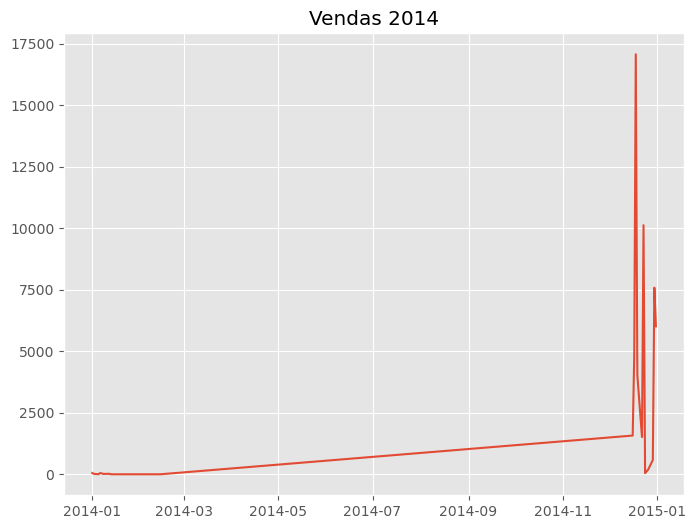

In [119]:
vendas_date = car.groupby('saledate')['sellingprice'].count().reset_index()
vendas_2014 = vendas_date[vendas_date['saledate'].dt.year ==2014].set_index('saledate') #filtrando vendas por 2024

plt.plot(vendas_2014.index, vendas_2014)
plt.title('Vendas 2014')

Text(0.5, 1.0, 'Vendas 2015')

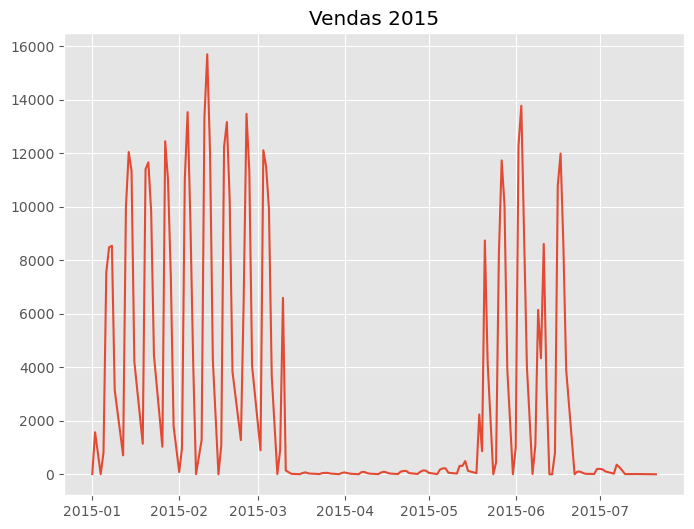

In [120]:
vendas_2015 = vendas_date[vendas_date['saledate'].dt.year ==2015].set_index('saledate')

plt.plot(vendas_2015.index, vendas_2015)
plt.title('Vendas 2015')

Text(0.5, 1.0, 'Vendas por Dias em 2014 e 2015')

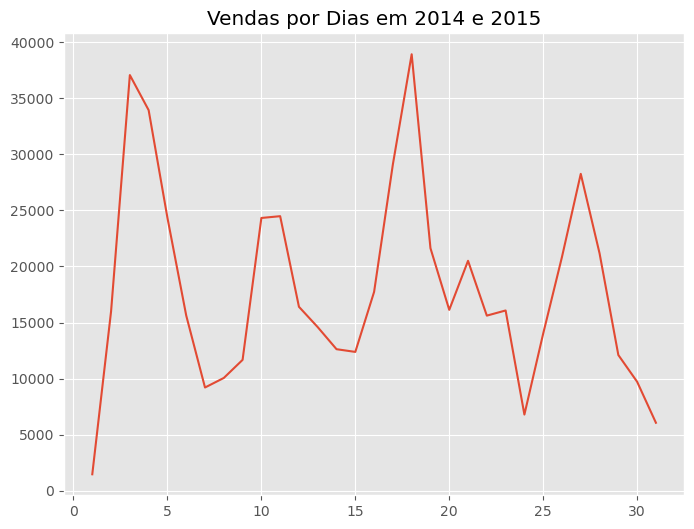

In [121]:
vendas_date['dia'] = vendas_date['saledate'].dt.day
vendas_dia = vendas_date.groupby('dia')['sellingprice'].sum()
plt.plot(vendas_dia.index, vendas_dia)
plt.title('Vendas por Dias em 2014 e 2015')


Traçando um gráfico de linhas com as vendas médias por cada dia, vemos que há 4 picos de vendas. É um pico de vendas quase que semanal. Seria interessante, as concessionárias fazerem algum tipo de promoção nesses vales do gráfico, pois sabem que as vendas irão em média cair nesses dias.

## 8  - Qual faixa de preço de carro é mais vendido?

Text(0.5, 1.0, 'Quantidade de vendas por Categoria de Carro')

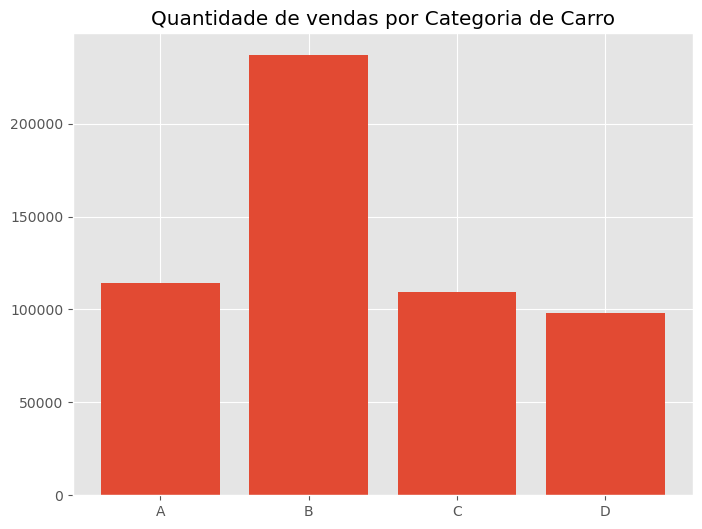

In [122]:
categoria = car.groupby('Category')['vin'].count()
plt.bar(categoria.index, categoria)
plt.title('Quantidade de vendas por Categoria de Carro')

Carros entre 10 e 20k são os favoritos. Talvez pois esses é o estoque maior de carro, ou o preço é mais atrativo para aquele publico

## 9 - Qual marca de carro é a mais vendida?

Text(0.5, 0, 'Unidades')

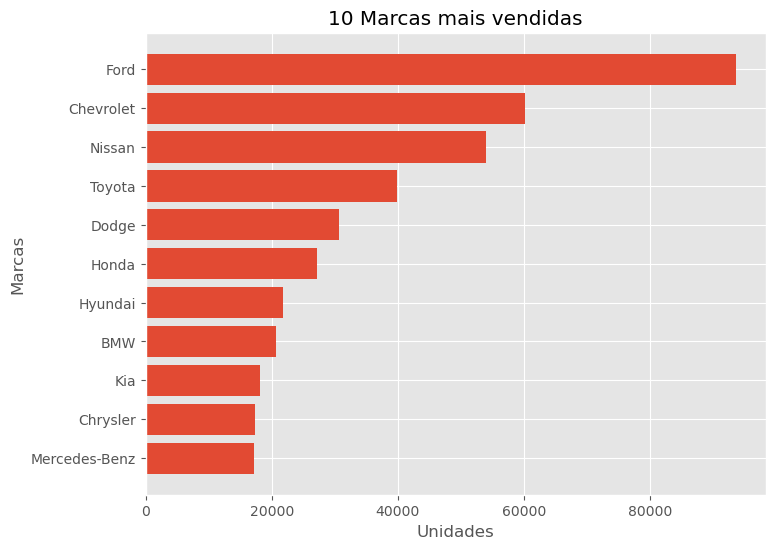

In [123]:
make = car['make'].value_counts().sort_values()
make = make[make>1]
plt.barh(make.index[-11:], make[-11:])
plt.title('10 Marcas mais vendidas')
plt.ylabel('Marcas')
plt.xlabel('Unidades')

Temos a lei de paretto sendo estabelecida. Ford como sendo o carro mais vendido, disparado. Porém, qual é o faturamento que cada um gera? Pois carros como Ferrari, Tesla podem custar muito, e gerar um bom faturamento para a empresa.

Text(0.5, 0, 'Faturamento')

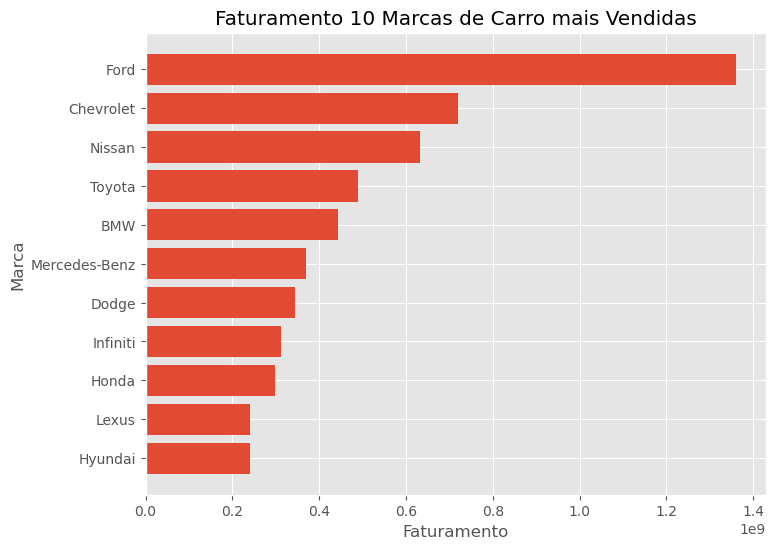

In [32]:

fat_car = car.groupby('make')['sellingprice'].sum().sort_values()
plt.barh(fat_car.index[-11:], fat_car[-11:])
plt.title('Faturamento 10 Marcas de Carro mais Vendidas')
plt.ylabel('Marca')
plt.xlabel('Faturamento')

A BMW ultrapassou a Dodge e a Honda, porém, as 4 mais vendidas mantiveram suas posições de mais faturadas também. Portanto, podemos dizer que é muito interessante manter um bom estoque de carros como a ford, chevrolet. Ou pode ser que são os carros que mais tem estoque também!

In [134]:
car.columns


Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate', 'Category', 'Year Category'],
      dtype='object')